# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
#DOWNLOAD HTML

url = "https://es.wikipedia.org/wiki/Leucocito"
html_data = requests.get(url, time.sleep(2)).text
html_data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Leucocito - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-

In [3]:
#TRANFORM HTML

soup = BeautifulSoup(html_data)
html_table = soup.find("table",{"class":"wikitable"})
html_table

<table class="wikitable">
<tbody><tr>
<th>Tipo</th>
<th>Apariencia microscópica</th>
<th>Diagrama</th>
<th>Porcentaje aproximado en adultos</th>
<th>Diámetro (μm)</th>
<th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></

In [4]:
#FINDING THE TABLES

for row_index, row in enumerate(html_table.tbody.find_all('tr')):
   print(row_index, row)

0 <tr>
<th>Tipo</th>
<th>Apariencia microscópica</th>
<th>Diagrama</th>
<th>Porcentaje aproximado en adultos</th>
<th>Diámetro (μm)</th>
<th><sup class="reference separada" id="cite_ref-isbn0-443-01657-7_7-0"><a href="#cite_note-isbn0-443-01657-7-7"><span class="corchete-llamada">[</span>7<span class="corchete-llamada">]</span></a></sup>​ Principal objetivo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-1"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Núcleo</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-2"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Gránulos</th>
<th><sup class="reference separada" id="cite_ref-alberts_table_4-3"><a href="#cite_note-alberts_table-4"><span class="corchete-llamada">[</span>4<span class="corchete-llamada">]</span></a></sup>​ Vida media<sup class=

In [5]:
#BUILDING THE DATA FRAME

arr_data = []

for row_index, row in enumerate(html_table.tbody.find_all('tr')):
   arr_cells_data = []
   if row_index == 0:
      for cell in row.find_all('th'):
         arr_cells_data.append(cell.get_text(strip=True))
   else:
      for cell in row.find_all('td'):
         arr_cells_data.append(cell.get_text(strip=True))
   
   arr_data.append(arr_cells_data)

arr_data

[['Tipo',
  'Apariencia microscópica',
  'Diagrama',
  'Porcentaje aproximado en adultos',
  'Diámetro (μm)',
  '[7]\u200b Principal objetivo',
  '[4]\u200b Núcleo',
  '[4]\u200b Gránulos',
  '[4]\u200b Vida media[7]\u200b'],
 ['Neutrófilo',
  '',
  '',
  '62%',
  '10-12',
  'BacteriasHongosVirus',
  'Multilobulado',
  'Fino, ligeramente rosado (tinción HyE)',
  '6 horas-unos cuantos días, dura días en bazo y otros tejidos.'],
 ['Eosinófilo',
  '',
  '',
  '2.3%',
  '10-12',
  'MacroparásitosModulan respuesta alérgica inflamatoria',
  'Bi-lobulado',
  'Se encuentran en un color rosa-anaranjado',
  '8–12 días; circulan por 4 o 5 horas en el torrente sanguíneo.'],
 ['Basófilo',
  '',
  '',
  '0.4%',
  '12-15',
  'Liberan histamina para respuesta inflamatoria',
  'Bi-lobulado o tri-lobulado',
  'Azul oscuro',
  'De pocas horas hasta pocos días'],
 ['Linfocito',
  '',
  '',
  '30%',
  'Linfocitos pequeños: 7–8 Linfocitos grandes: 12–15',
  'Linfocitos B: liberaanticuerposy coopera para la 

In [6]:
#SELECTING THE DATA BASE

df = pd.DataFrame(arr_data[1:], columns=arr_data[:1])
df
data_selection = df[['Tipo','Porcentaje aproximado en adultos']]
data_selection


,Tipo,Porcentaje aproximado en adultos
0,Neutrófilo,62%
1,Eosinófilo,2.3%
2,Basófilo,0.4%
3,Linfocito,30%
4,Monocito,5.3%


/tmp/ipykernel_468/2545070694.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selection['Porcentaje aproximado en adultos'] = data_selection['Porcentaje aproximado en adultos'].str.rstrip('%').astype(float)


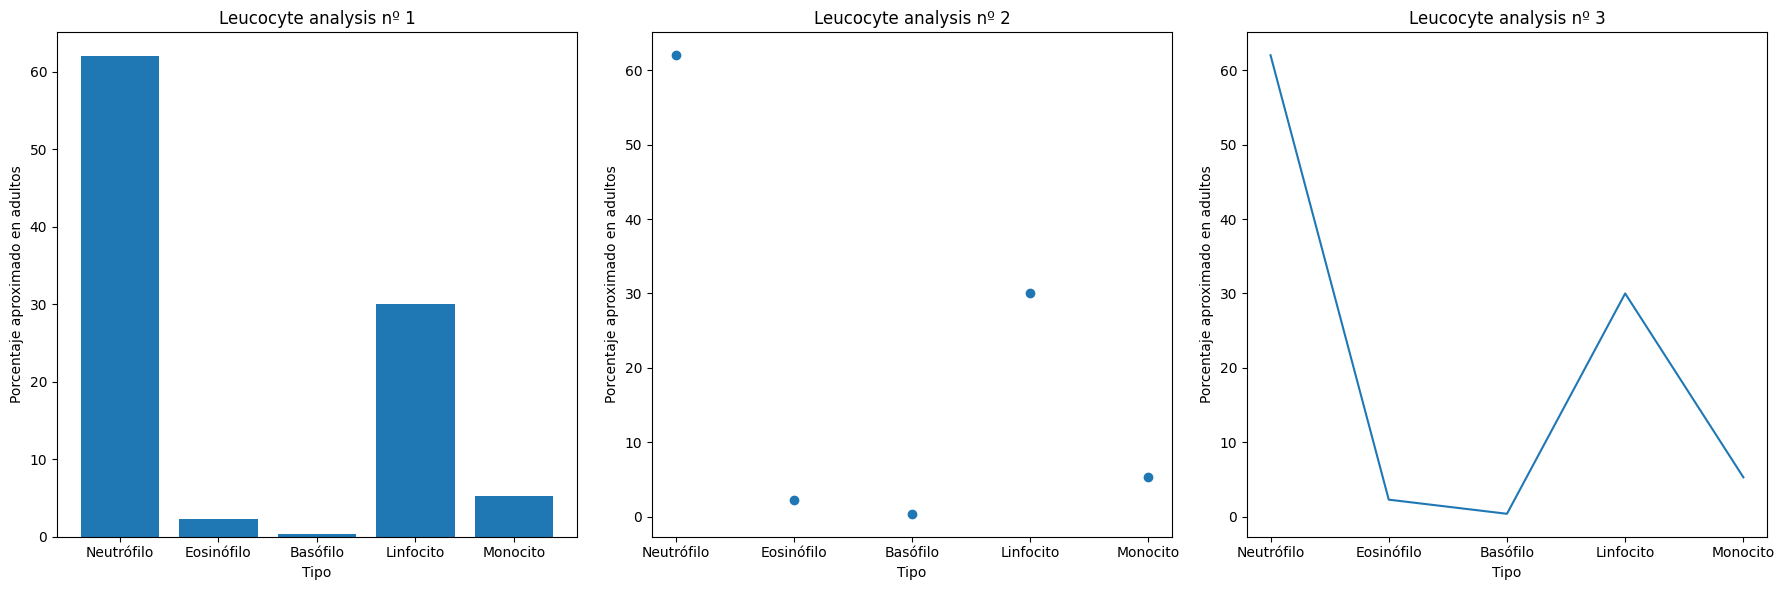

In [7]:
#CREATING THE GRAPHS TO DISPLAY AND ANALYSE THE DATA

# Creating the DataFrame
df = pd.DataFrame(arr_data[1:], columns=arr_data[0])

# Selecting the desired columns
data_selection = df[['Tipo', 'Porcentaje aproximado en adultos']]

# Removing percentage symbols and converting to numeric
data_selection['Porcentaje aproximado en adultos'] = data_selection['Porcentaje aproximado en adultos'].str.rstrip('%').astype(float)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot
axes[0].bar(data_selection['Tipo'], data_selection['Porcentaje aproximado en adultos'])
axes[0].set_xlabel('Tipo')
axes[0].set_ylabel('Porcentaje aproximado en adultos')
axes[0].set_title('Leucocyte analysis nº 1')

# Plot 2: Scatter plot
axes[1].scatter(data_selection['Tipo'], data_selection['Porcentaje aproximado en adultos'])
axes[1].set_xlabel('Tipo')
axes[1].set_ylabel('Porcentaje aproximado en adultos')
axes[1].set_title('Leucocyte analysis nº 2')

# Plot 3: Line plot
axes[2].plot(data_selection['Tipo'], data_selection['Porcentaje aproximado en adultos'])
axes[2].set_xlabel('Tipo')
axes[2].set_ylabel('Porcentaje aproximado en adultos')
axes[2].set_title('Leucocyte analysis nº 3')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()
